<a href="https://colab.research.google.com/github/Alveuz/Intro2MLwithPython/blob/master/notebooks/01Intro2PPwAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro al Pre-procesamiento 

<img src="http://tanukamandal.com/wp-content/uploads/2018/05/data-preparation-1-570x350.png" width="800" align="middle">

---



## Contenido de la Sesión


1.   Introducción al Pre-procesamiento de Datos
          1.1. Tipos de PP.
2.   Exploración Visual de los Datos
          2.1. Histogramas.
            2.1.1. Joyplot
          2.2. Diagramas de Dispersión.

### Literatura recomendada:

1. García, S., Luengo, J., & Herrera, F. (2015). Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

---

### Introducción al Pre-procesamiento (PP) de Datos.

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL. 

Según el Foro Económico Mundial, **¡para 2025 generaremos alrededor de 463 exabytes ($463*10^{18}$ bytes = 463 milliones de TB) de datos a nivel mundial por día!**. Entonces, deberiamos preguntarnos

*   ¿todos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje automático?
*   ¿Cómo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la información útil que puede derivarse de estos afectará directamente la capacidad de nuestros modelos.

>> **Garbage In, Garbage Out**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/525px-Data_visualization_process_v1.png)

Tomado de: https://www.kdnuggets.com/2016/03/data-science-process.html


---
### Entonces, ¿qué es el PP de datos?

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es capáz de asimilar (números continuos) y sin datos faltantes.  Por ejemplo, consideremos un conjunto de datos de aprobación crediticia.
Dicho conjunto consta de:

650 clientes (filas), 15 variables explicativas (nominales/categóricas y númericas) así como una clase (en total 16 columnas).

>> pregunta: **¿Una computadora puede analizar variables nominales?**

>> En el caso negativo, **¿cómo podriamos convertir la variable para que la computadora pueda interpretar dicha variable?**

>> **¿Qué se debe hacer cuando una variable presenta un dato faltante?**


In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/CreditApproval/creditApproval_dataset.csv'
df1 = pd.read_csv(url)

data_table.DataTable(df1, include_index=True, num_rows_per_page=10)
#data_table.DataTable? #How to display help regarding a function

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### ¿Cómo identificarían si una variable, por ejemplo **A4** tiene valores faltantes?

In [ ]:

### Here your answer...

print(df1.A4.unique()=='?')

[False False  True False]


Si bien mucha información se encuentra en un formato tabular o algún otro compatible, no siempre es el caso. 
Los **datos pueden tener muchas formas diferentes: 
tablas estructuradas, imágenes, archivos de audio, videos, etc**.

Las máquinas no entienden los datos de texto, imagen o video **tal como son**, entienden los 1 y los 0. Por lo tanto, no es suficiente con hacer una presentación de diapositivas de todas nuestras imágenes y esperar que nuestro modelo de aprendizaje automático se entrene solo con eso.

![](https://imgs.xkcd.com/comics/machine_learning.png)

#### Por ejemplo, en el caso de una imagen correspondiente al dígito **6** escrito a mano

#### ¿Cómo podemos representarla para que una máquina entienda una imagen?

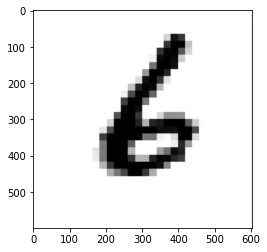

In [ ]:
from matplotlib import image as img
from matplotlib import pyplot as plt

image = img.imread("https://i.stack.imgur.com/Ds5Rc.png")

plt.imshow(image)

Representamos la imagen en una matriz, o mejor dicho, varias matrices correspondientes a la escala de colores en Rojo, Verde y Azul (RGB por sus siglas en inglés). Por lo tanto, una imagen corresponde a 3 matrices $z_i\in Z$, de tamaño $m\times n$.

In [ ]:
print(type(image)) #El objeto devuelto es un arreglo multidimensional MxNxD
print(image.shape) #Funciones de numpy.ndarray, devuelve el tamaño del arreglo.
#print(image)

<class 'numpy.ndarray'>
(599, 602, 3)


---
### ¿Cuáles son los problemas básicos que deben resolverse en el PP de datos?

> En cualquier proceso de Machine Learning, **el PP es el paso en el que los datos se transforman o codifican** para llevarlos a un estado tal que ahora la máquina pueda analizarlos fácilmente. 

Estos son algunos de los tipos de problemas básicos así como la familia de técnicas de PP a la que pertenecen:
* ¿Cómo limpio los datos? ***Limpieza de datos***.
* ¿Cómo unifico y escalo los datos? ***Normalización de datos***.
* ¿Cómo proporciono datos precisos? ***Transformación de datos***.
* ¿Cómo manejo los datos faltantes? ***Imputación de datos perdidos***.
* ¿Cómo incorporo y ajusto datos? ***Integración de datos***.
* ¿Cómo detecto y manejo el ruido? ***Análisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)

<!-- <img src="https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo" width="800" align="middle"> -->

---
#### a.1. Limpieza de Datos.

Involucra operaciones como
* **corrección** de datos 
* **filtrar datos** especificios o incorrectos 
* **reducir detalles** innecesarios. 

Es un concepto general que se traslapa con otras técnicas de PP como la imputación de datos faltantes y análisis del ruido (aunque ambas categorías se ven por separado para un análisis más profundo). 

Otras operaciones son 
* la **detección de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido). 

Esto típicamente requiere intervención humana ya que es necesaria la comprensión de los datos originales.

#### Ejemplo:

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

<img src="https://docs.google.com/uc?export=download&id=1SY3zCno1dL3qukcBjWz8xIa7gkfbqm7D" width="800" align="middle">




In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/CreditApproval/creditApproval_dataset.csv'
df = pd.read_csv(url)
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [ ]:
#Valores únicos de la variable A4
print(df.A4.unique())

#Ahora queremos remover (por alguna razón) los registros de la matriz donde
#la variable A4 == 'u'
df1 = df[ df['A4'] != 'u' ]
print(df1.A4.unique())

#También podriamos querer acotarnos a un rango de valores, por ejemplo para la
#variable 'A3' entre 4 y 10
df2 = df[(df['A3'] > 4) & (df['A3'] < 10)]
print(df.A3.unique())
print(df2.A3.unique())

['u' 'y' '?' 'l']
['y' '?' 'l']
[ 0.     4.46   0.5    1.54   5.625  4.     1.04  11.585  4.915  0.83
  1.835  6.     6.04  10.5    4.415  0.875  5.875  0.25   8.585 11.25
  1.     8.    14.5    6.5    0.585 13.    18.5    8.5   14.79   9.79
  7.585  5.125 10.75   1.5    1.585 11.75   9.415  9.17  15.     1.415
 13.915 28.     6.75   2.04   0.665  2.5    3.    11.625  4.5   12.25
 16.165  0.79   0.835  4.25   0.375 25.125  7.5    5.     7.     5.29
  1.165  9.75  19.     3.5    0.625  2.21  12.75  15.5    1.375  3.54
 11.     1.75  16.5   12.     2.25   0.75  12.5    1.25   1.125  7.04
 10.335  6.21   6.665  9.     5.5    0.54   2.75   9.5   13.5    3.75
 16.     0.29   1.665  7.54   0.46  10.    11.5    3.04   2.     0.08
  1.71   3.25   2.54  13.585  8.665  9.25   8.17   2.335 19.5    5.665
  4.625  0.205  0.96   4.04   5.04   3.165  7.625 10.04  10.25   2.125
  9.335  6.625  2.71   9.625 12.54   9.54   8.46  13.75  21.    10.125
 25.085  0.21  21.5   11.125 11.045  1.335  0.085  1.2

In [ ]:
#O cambiar los valores de una columna en específico
df3 = df

df3 = df3.replace({'class': '+'}, 1)
df3 = df3.replace({'class': '-'}, -1)

data_table.DataTable(df3, include_index=True, num_rows_per_page=10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-1
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-1
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-1


---
#### a.2. Normalización de Datos.

La unidad de medida utilizada puede afectar el análisis de datos.

>> Por ejemplo: típicamente los datos atmosféricos en Cuernavaca, reflejan una  temperatura acotada entre 8 a 40 °C, mientras que la presión atmosférica esta data entre 950 a 1050 mbar. 
>> <img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/Dosen-barometer.jpg" width="400">
>> 
>> * ¿Qué variable predomina más? 
>> * ¿Qué cambio produce un mayor efecto, una diferencia de 5°C de temperatura o 20 mbar de presión?

La normalización de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y así como una escala en común (determinada).

#### Ejercicio:

1. Escalar los valores de las columnas A3 y A15 entre 0 y 1.

Utilice la siguiente formula:

$$x_{new} = \frac{x-a}{b-a}$$

tal que

$$a=\min(x),\ b=\max(x)$$

2. Escalar las mismas columnas pero entre dos valores arbitrarios $q$ y $z$, tal que $q<z$.

Utilice la siguiente formula:

$$x_{qz}= (z-q)\cdot x_{new}+q$$


In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/CreditApproval/creditApproval_dataset.csv'
df = pd.read_csv(url)

print('A3 max val:', df.A3.max())
print('A3 max ID:', df.A3.idxmax())
print('A15 max val:', df.A15.max())
print('A15 max ID:', df.A15.idxmax())
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

A3 max val: 28.0
A3 max ID: 44
A15 max val: 100000
A15 max ID: 317


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [ ]:
import numpy as np
import pandas as pd 

def scale(x):
    tmp_min = x.min()
    tmp_max = x.max()
    x_new = (x - tmp_min)/(tmp_max - tmp_min)
    return x_new

df1 = df.copy()
df1.A3 = scale(df1.A3)
df1.A15 = scale(df1.A15)

print('A3 max val:', df1.A3.max())
print('A3 max ID:', df1.A3.idxmax())
print('A15 max val:', df1.A15.max())
print('A15 max ID:', df1.A15.idxmax())

data_table.DataTable(df1, include_index=True, num_rows_per_page=10)

A3 max val: 1.0
A3 max ID: 44
A15 max val: 1.0
A15 max ID: 317


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000000,u,g,w,v,1.25,t,t,1,f,g,202,0.00000,+
1,a,58.67,0.159286,u,g,q,h,3.04,t,t,6,f,g,43,0.00560,+
2,a,24.5,0.017857,u,g,q,h,1.50,t,f,0,f,g,280,0.00824,+
3,b,27.83,0.055000,u,g,w,v,3.75,t,t,5,t,g,100,0.00003,+
4,b,20.17,0.200893,u,g,w,v,1.71,t,f,0,f,s,120,0.00000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,0.360179,y,p,e,h,1.25,f,f,0,f,g,260,0.00000,-
686,a,22.67,0.026786,u,g,c,v,2.00,f,t,2,t,g,200,0.00394,-
687,a,25.25,0.482143,y,p,ff,ff,2.00,f,t,1,t,g,200,0.00001,-
688,b,17.92,0.007321,u,g,aa,v,0.04,f,f,0,f,g,280,0.00750,-


In [ ]:
import numpy as np
import pandas as pd 

def scale(x,q,z):
    tmp_min = x.min()
    tmp_max = x.max()
    x_new = (z-q)*((x - tmp_min)/(tmp_max - tmp_min))+q
    return x_new

df1 = df.copy()
df1.A3 = scale(df1.A3,2,7)
df1.A15 = scale(df1.A15,5,9)

print('A3 max val:', df1.A3.max())
print('A3 max ID:', df1.A3.idxmax())
print('A15 max val:', df1.A15.max())
print('A15 max ID:', df1.A15.idxmax())

data_table.DataTable(df1, include_index=True, num_rows_per_page=10)

A3 max val: 7.0
A3 max ID: 44
A15 max val: 9.0
A15 max ID: 317


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,2.000000,u,g,w,v,1.25,t,t,1,f,g,202,5.00000,+
1,a,58.67,2.796429,u,g,q,h,3.04,t,t,6,f,g,43,5.02240,+
2,a,24.5,2.089286,u,g,q,h,1.50,t,f,0,f,g,280,5.03296,+
3,b,27.83,2.275000,u,g,w,v,3.75,t,t,5,t,g,100,5.00012,+
4,b,20.17,3.004464,u,g,w,v,1.71,t,f,0,f,s,120,5.00000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,3.800893,y,p,e,h,1.25,f,f,0,f,g,260,5.00000,-
686,a,22.67,2.133929,u,g,c,v,2.00,f,t,2,t,g,200,5.01576,-
687,a,25.25,4.410714,y,p,ff,ff,2.00,f,t,1,t,g,200,5.00004,-
688,b,17.92,2.036607,u,g,aa,v,0.04,f,f,0,f,g,280,5.03000,-


---
#### a.3. Transformación de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea más *eficiente/efectivo*. 

Entre las técnicas de transformación de datos se encuentra
* el **suavizamiento**.
    * <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/12/Zoomed-Moving-Average-Transform.png" width="500">
* **construcción de características**.
    * <img src="https://docs.google.com/uc?export=download&id=1a4zaszYOY3Rc7YX5Ggo1gBykOz_nwnML" width="700" align="center">
* **agregación o resumen** de datos.
* **discretización**.
* **generalización**. 

Sin embargo, la mayoría de estas se pueden considerar como áreas independientes.

Las tareas que requieren supervisión humana son las técnicas clásicas de transformación de datos como: 
* la generación de informes
* nuevos atributos que agregan los existentes 
* generalización de conceptos, especialmente en atributos categóricos
    * ej. la sustitución de fechas completas por solo números de año.

#### Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformación de variables nominales/categóricas en númericas. Esta transformación consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta será reemplazada por V1, V2 y V3, en donde se pondrá un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

<img src="https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU" width="700" align="center">

Por ejemplo, si tenemos ``df.A1=['red', 'red', 'green']``

Cada valor de A1 se representara por un vector de 0's y 1's. Esto es ``[1,0],[1,0],[0,1]``. 

Ahora, en lugar de tener ``df.A1``, tenemos ``df.A1_red,df.A1_ref``.

**Actividad**: Aplicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobación de crédito.

In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/CreditApproval/creditApproval_dataset.csv'
df = pd.read_csv(url)

# With Pandas is too easy
cat_columns = ["A4"]
df_processed = pd.get_dummies(df, prefix_sep="_",
                             columns=cat_columns)

data_table.DataTable(df_processed, include_index=True, num_rows_per_page=10)

#With pandas but step by step
print(df.A4.dtype)
df['A4'] = pd.Categorical(df['A4']) # cast our categorical variable into the built-in pandas Categorical data type
print(df.A4.dtype)
dfDummies = pd.get_dummies(df['A4'], prefix = 'A4x')
df = pd.concat([df, dfDummies], axis=1)
df = df.drop(['A4'], axis=1)

data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class,A4_?,A4_l,A4_u,A4_y
0,b,30.83,0.000,g,w,v,1.25,t,t,1,f,g,202,0,+,0,0,1,0
1,a,58.67,4.460,g,q,h,3.04,t,t,6,f,g,43,560,+,0,0,1,0
2,a,24.5,0.500,g,q,h,1.50,t,f,0,f,g,280,824,+,0,0,1,0
3,b,27.83,1.540,g,w,v,3.75,t,t,5,t,g,100,3,+,0,0,1,0
4,b,20.17,5.625,g,w,v,1.71,t,f,0,f,s,120,0,+,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,p,e,h,1.25,f,f,0,f,g,260,0,-,0,0,0,1
686,a,22.67,0.750,g,c,v,2.00,f,t,2,t,g,200,394,-,0,0,1,0
687,a,25.25,13.500,p,ff,ff,2.00,f,t,1,t,g,200,1,-,0,0,0,1
688,b,17.92,0.205,g,aa,v,0.04,f,f,0,f,g,280,750,-,0,0,1,0


---
### a.4. Imputación de datos faltantes.

El propósito es llenar las variables que contienen **valores faltantes** (missing values en inglés) con algunos datos intuitivos. 

En la mayoría de los casos, es mejor agregar una estimación razonable de un valor de datos adecuado que dejarlo en blanco.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

Tomado de: https://stefvanbuuren.name/fimd/missing-data-pattern.html

---
### a.5. Integración de Datos.

Comprende la fusión de datos de múltiples fuentes de datos. 

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante. 

Las operaciones típicas logradas dentro de la integración de datos son la 
* **identificación** y **unificación** de variables y dominios
* **análisis de correlación** entre atributos
* **identificación de duplicación** y **detección de conflictos** en los valores de datos de diferentes fuentes.

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_append2.png" width="700">

#### Ejercicio:

Dada la pandemia desencadenada por el COVID19, deseamos entender mejor la  propagación del virus. Los datos por país se pueden consultar en el repositorio de github https://datahub.io/core/covid-19#data. Sin embargo, para nuestro análisis requerimos enfocarnos en los **casos confirmados acumulados por día y país**.

Para esto necesitamos en el eje $y$ (renglones) las fechas, y en el eje $x$ (columnas) los paises. **Realice las acciones de pivoteo necesarias para obtener el DataFrame requerido. La variable ``Date`` debe de ser de tipo fecha. Aseguresé de guardar los resultados en un archivo CSV para su posterior análisis.**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import data_table

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/COVID19/covid19WW.csv'
df = pd.read_csv(url)

# print(df.dtypes)
# print(df.Date.dtype)
df['Date'] = pd.to_datetime(df['Date'])
# print(pd.to_datetime(df['Date'], format='%m/%d/%Y'))
# df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# print(pd.to_datetime(df['Date']).dt.floor('d'))
# df['Date'] = pd.to_datetime(df['Date']).dt.floor('d')
# print(df['Date'])
# print(df.dtypes)
# print(df.Date.dtype)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html

# data_table.DataTable(df, include_index=True, num_rows_per_page=10)
df.rename(columns={'Country/Region':'Country'}, inplace=True)

df1= df.pivot_table(index='Date', 
                    columns='Country', 
                    values='Confirmed',
                    aggfunc=np.sum)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

df1.to_csv('covid19PivotWW.csv')
data_table.DataTable(df1, include_index=True, num_rows_per_page=40)

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-11,4687.0,872.0,5891.0,755.0,45.0,25.0,6278.0,3392.0,6970.0,15882.0,2589.0,93.0,5236.0,15691.0,84.0,23906.0,53449.0,18.0,319.0,9.0,2831.0,2141.0,24.0,169594.0,141.0,1990.0,760.0,180.0,15.0,260.0,122.0,2689.0,71264.0,143.0,322.0,30063.0,84011.0,11613.0,11.0,333.0,...,1886.0,10176.0,11.0,338.0,23822.0,1457.0,1460.0,1089.0,10652.0,156.0,227436.0,869.0,1526.0,10.0,26670.0,30344.0,47.0,440.0,661.0,509.0,3015.0,24.0,181.0,116.0,1032.0,139771.0,1347881.0,121.0,15648.0,18878.0,224332.0,711.0,2486.0,422.0,288.0,375.0,6.0,56.0,267.0,36.0
2020-05-12,4963.0,876.0,6067.0,758.0,45.0,25.0,6563.0,3538.0,6980.0,15961.0,2693.0,93.0,5531.0,16660.0,85.0,24873.0,53779.0,18.0,327.0,11.0,2964.0,2158.0,24.0,178214.0,141.0,2023.0,766.0,180.0,15.0,267.0,122.0,2689.0,72419.0,143.0,357.0,31721.0,84018.0,12272.0,11.0,333.0,...,1995.0,10243.0,11.0,338.0,24671.0,1465.0,1461.0,1170.0,11350.0,194.0,228030.0,889.0,1661.0,10.0,27272.0,30380.0,47.0,440.0,729.0,509.0,3017.0,24.0,199.0,116.0,1032.0,141475.0,1369376.0,129.0,16023.0,19661.0,227741.0,717.0,2519.0,423.0,288.0,375.0,6.0,65.0,441.0,36.0
2020-05-13,5226.0,880.0

---
### a.6. Identificación de Datos Anómalos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida. Tenga en cuenta que nos referimos a este proceso como  **identificación** de ruido en lugar de la **eliminación** de ruido. 

<img src="https://pbs.twimg.com/media/DP9I5Y1WkAA6ZM9?format=jpg&name=900x900" width="400">

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">

Una vez que se detecta un ejemplo ruidoso, podemos aplicar un proceso basado en la corrección que podría involucrar algún tipo de operación subyacente.

<img src="https://anomaly.io/wp-content/uploads/2017/01/correlation-anomaly-detected.png" width="800" align="middle">

---


### Otras actividades asociadas al PP: Reducción de Datos

La **reducción de datos** comprende el conjunto de técnicas que, de una forma u otra, obtienen una representación reducida de los datos originales.

El **objetivo** de la redución de los datos es ***encontrar un sub-conjunto $C'$ que se aproxime al conjunto original $C$ tal que la información contenida en $C' \approx C$***. Esto típicamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce. 

<img src="https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v" width="400" align="middle">

Algo interesante, es que mientras el PP es fundamental, la reducción de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es más que una sugerencia:

* Para su ejecución y de acuerdo a formulación, todos los algoritmos de ML estan sujetos a un 
  * **tiempo de computo específico** 
  * **memoria** específica.
  * **tamaño del conjunto de datos** 
  * etc.

  Entonces, si el tamaño del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volverá **prohibitivo**.  

<img src="https://upload.wikimedia.org/wikipedia/commons/0/09/Binary_search_vs_Linear_search_example_svg.svg" width="300" style="background-color:white;">

* Respecto a la **memoria** y **tamaño del conjunto de datos**, estos se encuentra relacionados a la **Maldición de la Dimensionalidad** (Curse of Dimensionality en inglés).
La maldición de la dimensionalidad es una familia de fenómenos relacionados a aquellos problemas descritos por muchas dimensiones, lo que no sucede en aquellos sistemas de pocas dimensiones. 

    * Alta Dimensionalidad
        * Definición: ***Espacio de Características*** (Feature Space en inglés); determina todo el posible conjunto de combinaciones (realistas o no) de los valores que tendrán las variables del problema.

        Ahora supongamos que queremos realizar una predicción usando solo una dimensión que esta acotada entre 0 y 1, $X^D \mid D=1,\ 0\leq x_1 \leq 1$. En este caso, podemos conocer $1/3$ de todos los posibles resultados conociendo una tercera parte de la variable $x_1$, como se observa en la siguiente figura  <img src="https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH" width="600" style="background-color:white;">
        
        Si ahora utilizamos dos variables, $X^D \mid D=2, 0\leq x_1,\ x_2 \leq 1$, y dividimos ambas en 3 partes, podemos dibujar un cuadrado que cubra $1/3$ de los valores de cada variable en 3 partes. Sin embargo, este cuadrado, no cubre $1/3$ parte de todas las combinaciones de $x_1 \text{ y } x_2$, en cambio, ¡solo cubre $1/9 \sim 11 \text{\%}$ ! <img src="https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK" width="600" style="background-color:white;">

        Si añadimos una tercer variable y repetimos el mismo proceso, el cubo resultante solo cubrirá $1/27 \approx 4\text{\%}$ de todas las posibles combinaciones. <img src="https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90" width="600" style="background-color:white;">

        De hecho
        <img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">

<!--Por ejemplo, si el objetivo es reducir el número de dimensiones el objetivo estaría dado por  
$C'^D \approx C^F \mid F>D $. -->
